In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
vegis_data = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/cleaned_vegis_traindata_100424.csv", index_col=None)
display(vegis_data.head())

,green onion pixels,ratio area,circularity,sym_vertical,sym_horizontal,ratio_w_h,Label
0,0,0.647600,0.497062,0.80,0.74,0.560000,Zwiebel
1,29,0.658969,0.448148,0.90,1.00,0.970000,Zwiebel
2,3,0.780295,0.826132,0.86,0.88,0.953704,Zwiebel
3,51,0.615217,0.330286,0.79,0.78,0.904348,Zwiebel
4,223,0.362615,0.112285,0.45,0.43,0.716312,Zwiebel


In [13]:
vegis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   green onion pixels  2153 non-null   int64  
 1   ratio area          2153 non-null   float64
 2   circularity         2153 non-null   float64
 3   sym_vertical        2153 non-null   float64
 4   sym_horizontal      2153 non-null   float64
 5   ratio_w_h           2153 non-null   float64
 6   Label               2153 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 117.9+ KB


In [14]:
X = vegis_data.iloc[:, :6]
y = vegis_data.iloc[:, 6]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("X_train")
display(X_train.head(1))
print("X_test")
display(X_test.head(1))
print("y_train")
display(y_train.head(1))
print("y_test")
display(y_test.head(1))

X_train


,green onion pixels,ratio area,circularity,sym_vertical,sym_horizontal,ratio_w_h
867,0,0.738496,0.760019,0.73,0.77,0.950617


X_test


,green onion pixels,ratio area,circularity,sym_vertical,sym_horizontal,ratio_w_h
1506,6898,0.430447,0.121601,0.36,0.52,0.839216


y_train


867    Kartoffel
Name: Label, dtype: object

y_test


1506    Karotte_Trieb
Name: Label, dtype: object

In [15]:
X_train.head(10)

,green onion pixels,ratio area,circularity,sym_vertical,sym_horizontal,ratio_w_h
867,0,0.738496,0.760019,0.73,0.77,0.950617
1606,7783,0.660266,0.278722,0.50,0.65,0.449799
1111,0,0.765874,0.784143,0.84,0.79,0.855072
1258,0,0.792233,0.831617,0.88,0.90,0.927536
1319,0,0.787415,0.853678,0.74,0.55,0.855721
1716,725,0.428030,0.151553,0.41,0.66,0.450000
374,1,0.643028,0.576873,0.75,0.86,0.706215
270,0,0.806376,0.779625,0.83,0.83,0.939597
988,0,0.808004,0.824058,0.89,0.97,0.712500
1418,2612,0.397054,0.195077,0.69,0.48,0.436090


In [10]:
ct = ColumnTransformer(
                        remainder='passthrough',
                        transformers=[
                                ("mm", MinMaxScaler(), ["green onion pixels"])])
X_train_scaled = ct.fit_transform(X_train)  
X_train_scaled[:2]

array([[0.        , 0.73849607, 0.76001853, 0.73      , 0.77      ,
        0.95061728],
       [0.75577782, 0.66026606, 0.27872246, 0.5       , 0.65      ,
        0.4497992 ]])

In [21]:
type(y_train)

pandas.core.series.Series

In [259]:
pipe = Pipeline([('ct',
                    ColumnTransformer(
                        remainder='passthrough', 
                        transformers=[("mm", MinMaxScaler(), [0])])), 
                    ('poly',PolynomialFeatures(degree=1)),
                    ('lgclf', LogisticRegression(penalty='l2', C=3e2, tol=0.001, solver='lbfgs', max_iter=50000, multi_class='multinomial'))])
pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mm', MinMaxScaler(), [0])])),
                ('poly', PolynomialFeatures(degree=1)),
                ('lgclf',
                 LogisticRegression(C=300.0, max_iter=50000,
                                    multi_class='multinomial', tol=0.001))])

In [260]:
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [261]:
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy Trainset: {acc_train} %\nAccuracy Test: {acc_test} %")

Accuracy Trainset: 0.7078977932636469 %
Accuracy Test: 0.6890951276102089 %


In [262]:
pipe.classes_

array(['Karotte', 'Karotte_Trieb', 'Kartoffel', 'Kartoffel_Trieb',
       'Zwiebel', 'Zwiebel_Trieb'], dtype=object)

In [263]:
pipe.n_features_in_

6

In [264]:
pipe.named_steps['lgclf'].coef_

array([[  1.32472485,  22.11972103,   3.84528047,  -4.87817761,
         -1.12408225,   0.68262023,  -7.70657611],
       [  1.08809754,  51.57751153,   0.25481492,  -4.15289881,
         -1.8887753 ,  -2.42432732,  -3.64008008],
       [ -1.24944501, -32.18724843, -11.31285423,  14.95759518,
          0.71677661,   4.61846115,   1.31987171],
       [ -1.11055395, -30.36971428,   5.91207738,  -2.41480815,
          1.77767434,  -1.60813103,   4.589833  ],
       [ -0.28976997, -53.57357991,  -0.88341626,   0.82184981,
          0.40734895,  -0.71427709,   5.17695928],
       [  0.23694654,  42.43331006,   2.18409773,  -4.33356041,
          0.11105765,  -0.55434594,   0.25999221]])

[[295   6   5   0  23   7]
 [ 19 245   0   0   0  15]
 [ 10   0 348   6  40   0]
 [  6   0  68  23 101   0]
 [ 25   1  84   4 239   1]
 [ 24  35   0   1  22  69]]





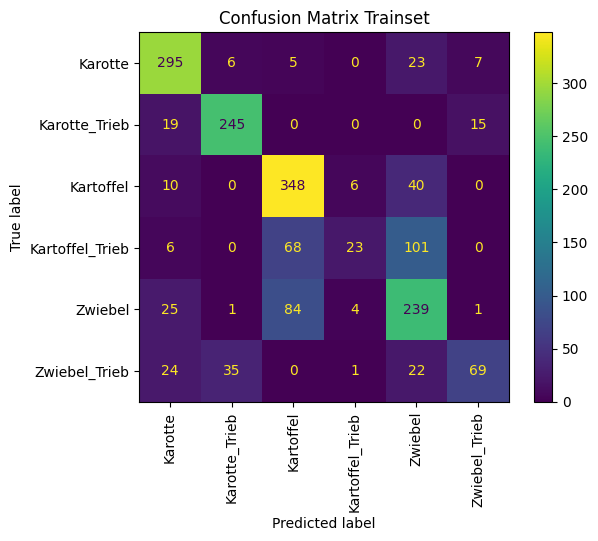

In [265]:
disp = ConfusionMatrixDisplay.from_estimator(
    pipe,
    X_train,
    y_train,
    display_labels=['Karotte', 'Karotte_Trieb', 'Kartoffel', 'Kartoffel_Trieb', 'Zwiebel', 'Zwiebel_Trieb'],
    xticks_rotation="vertical",
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title(f"Confusion Matrix Trainset")
print(disp.confusion_matrix)
print("\n\n")

In [266]:
y_train.value_counts()

Label
Kartoffel          404
Zwiebel            354
Karotte            336
Karotte_Trieb      279
Kartoffel_Trieb    198
Zwiebel_Trieb      151
Name: count, dtype: int64